# Comparing the models

## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import datetime
import numpy as np
import matplotlib.pylab as plt
import sklearn
import sklearn.metrics
import itertools
import io
import utils
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

## Load data

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Load Models

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


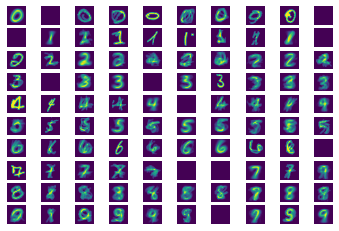

In [3]:
model_1 = tf.keras.models.load_model('models/model_1')
print(model_1.summary())
model_1_confusion = utils.Confusion(model_1, ds_test)
model_1_confusion.confusion_images()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


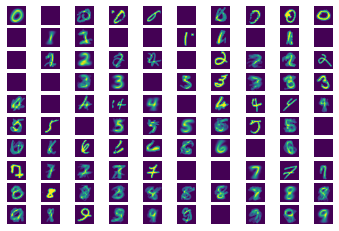

In [4]:
model_2 = tf.keras.models.load_model('models/model_2')
print(model_2.summary())
model_2_confusion = utils.Confusion(model_2, ds_test)
model_2_confusion.confusion_images()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


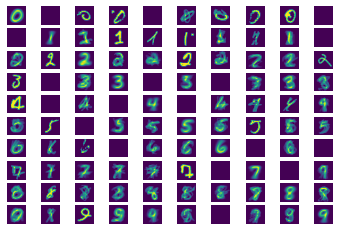

In [5]:
model_3 = tf.keras.models.load_model('models/model_3')
print(model_3.summary())
model_3_confusion = utils.Confusion(model_3, ds_test)
model_3_confusion.confusion_images()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


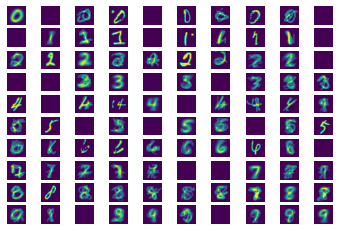

In [6]:
model_4 = tf.keras.models.load_model('models/model_4')
print(model_4.summary())
model_4_confusion = utils.Confusion(model_4, ds_test)
model_4_confusion.confusion_images()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


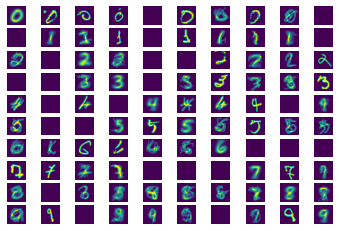

In [7]:
model_5 = tf.keras.models.load_model('models/model_5')
print(model_5.summary())
model_5_confusion = utils.Confusion(model_5, ds_test)
model_5_confusion.confusion_images()

## Setting up the DataFrame to Analyze

### Creating the DF, setting basic variables

In [8]:
images, classes = utils.get_images_classes(ds_test)

In [9]:
predictions_1 = model_1.predict(ds_test).argmax(axis=-1)   
predictions_2 = model_2.predict(ds_test).argmax(axis=-1)   
predictions_3 = model_3.predict(ds_test).argmax(axis=-1)   
predictions_4 = model_4.predict(ds_test).argmax(axis=-1)   
predictions_5 = model_5.predict(ds_test).argmax(axis=-1)

In [10]:
df = pd.DataFrame({
    "model_1": predictions_1,
    "model_2": predictions_2,
    "model_3": predictions_3,
    "model_4": predictions_4,
    "model_5": predictions_5,
})

df

,model_1,model_2,model_3,model_4,model_5
0,2,2,2,2,2
1,0,0,0,0,0
2,4,4,4,4,4
3,8,8,8,8,8
4,7,7,7,7,7
...,...,...,...,...,...
9995,5,5,5,5,5
9996,9,9,9,9,9
9997,8,8,8,8,8
9998,0,0,0,0,0


### Number of unique predictions

In [11]:
df['num_uniq_predictions'] = df.stack().groupby(level=0).nunique()
df

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions
0,2,2,2,2,2,1
1,0,0,0,0,0,1
2,4,4,4,4,4,1
3,8,8,8,8,8,1
4,7,7,7,7,7,1
...,...,...,...,...,...,...
9995,5,5,5,5,5,1
9996,9,9,9,9,9,1
9997,8,8,8,8,8,1
9998,0,0,0,0,0,1


### Get images

In [12]:
df["image_number"] = df.index
df["images"] = np.zeros(10000, dtype=np.int8)
df["images"] = df.apply(lambda row: images[row["image_number"]], axis=1)
del df["image_number"]
df

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images
0,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
1,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
2,4,4,4,4,4,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
3,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
4,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
...,...,...,...,...,...,...,...
9995,5,5,5,5,5,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
9996,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
9997,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
9998,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


### Get classes

In [13]:
df["labels"] = classes
df

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels
0,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2
1,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0
2,4,4,4,4,4,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4
3,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8
4,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7
...,...,...,...,...,...,...,...,...
9995,5,5,5,5,5,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5
9996,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9
9997,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8
9998,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0


### Get the number of correct predictions

In [14]:
def get_number_correct(row):
    num_correct = 0 + (row["model_1"] == row["labels"]) + (row["model_2"] == row["labels"]) + (row["model_3"] == row["labels"]) + \
        (row["model_4"] == row["labels"]) + (row["model_5"] == row["labels"])
    return num_correct

df["num_correct"] = df.apply(get_number_correct, axis=1)
df

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels,num_correct
0,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2,5
1,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5
2,4,4,4,4,4,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,5
3,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,5
4,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,5
...,...,...,...,...,...,...,...,...,...
9995,5,5,5,5,5,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,5
9996,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,5
9997,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,5
9998,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5


### Get the ranking of that label in terms of relative distance to the average image

In [15]:
average_image_map = model_1_confusion.average_image_hashmap()

def get_rank(row):
    # print(row)
    label = row["labels"]
    # image_num = row["image_number"]
    # print(image_num)
    # image = images[image_num]
    image = row["images"]
    distances = utils.get_distances(average_image_map, image)
    rank = utils.get_rank(distances, label)
    return rank

df["relative_distance"] = df.apply(get_rank, axis=1)
df

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels,num_correct,relative_distance
0,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2,5,1
1,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5,1
2,4,4,4,4,4,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,5,1
3,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,5,3
4,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,5,1
...,...,...,...,...,...,...,...,...,...,...
9995,5,5,5,5,5,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,5,1
9996,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,5,1
9997,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,5,1
9998,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5,1


In [16]:
# Get l2_norm(average_image(label), image)

average_image_map = model_1_confusion.average_image_hashmap()

def get_l2_norm(row):
    label = row["labels"]
    # image_num = row["image_number"]
    # image = images[image_num]
    image = row["images"]
    average_image = average_image_map[label]
    distance = utils.get_eucliean_dist(image,average_image)
    return distance

df["distance_to_mean_image_for_label"] = df.apply(get_l2_norm, axis=1)
df

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels,num_correct,relative_distance,distance_to_mean_image_for_label
0,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2,5,1,8.032634
1,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5,1,8.294668
2,4,4,4,4,4,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,5,1,6.691703
3,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,5,3,7.010712
4,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,5,1,5.279944
...,...,...,...,...,...,...,...,...,...,...,...
9995,5,5,5,5,5,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,5,1,6.250333
9996,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,5,1,5.795871
9997,8,8,8,8,8,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,5,1,7.600909
9998,0,0,0,0,0,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,5,1,5.932022


In [17]:
df.columns

Index(['model_1', 'model_2', 'model_3', 'model_4', 'model_5',
       'num_uniq_predictions', 'images', 'labels', 'num_correct',
       'relative_distance', 'distance_to_mean_image_for_label'],
      dtype='object')

## Analyze

### General analysis

<AxesSubplot:xlabel='labels', ylabel='distance_to_mean_image_for_label'>

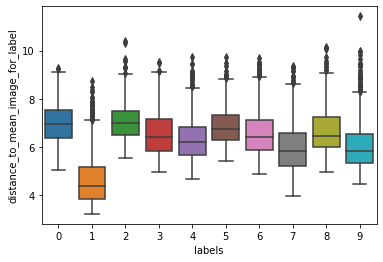

In [18]:
sns.boxplot(data =df, x="labels", y="distance_to_mean_image_for_label")

<AxesSubplot:xlabel='labels', ylabel='distance_to_mean_image_for_label'>

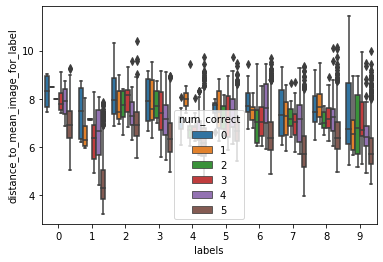

In [19]:
sns.boxplot(data=df, x="labels", y="distance_to_mean_image_for_label", hue="num_correct")

In [20]:
df["num_correct"].value_counts()

5    9128
4     432
3     153
0     110
1      92
2      85
Name: num_correct, dtype: int64

In [21]:
df.groupby("labels").mean()["num_correct"]

labels
0    4.938776
1    4.921586
2    4.772287
3    4.789109
4    4.835031
5    4.756726
6    4.831942
7    4.804475
8    4.728953
9    4.693756
Name: num_correct, dtype: float64

In [22]:
df["num_uniq_predictions"].value_counts()

1    9197
2     719
3      80
4       4
Name: num_uniq_predictions, dtype: int64

In [23]:
df.groupby("labels").mean()["num_uniq_predictions"]

labels
0    1.029592
1    1.031718
2    1.125969
3    1.107921
4    1.088595
5    1.125561
6    1.063674
7    1.079767
8    1.127310
9    1.119921
Name: num_uniq_predictions, dtype: float64

### Distance to mean image

#### General

In [24]:
df["distance_to_mean_image_for_label"].describe()

count    10000.000000
mean         6.324156
std          1.136953
min          3.209635
25%          5.637614
50%          6.332826
75%          7.077608
max         11.428500
Name: distance_to_mean_image_for_label, dtype: float64

In [25]:
df.groupby("labels").mean()["distance_to_mean_image_for_label"]

labels
0    6.965187
1    4.610231
2    7.030576
3    6.538868
4    6.313235
5    6.839205
6    6.571921
7    5.981238
8    6.654816
9    6.042303
Name: distance_to_mean_image_for_label, dtype: float64

#### Analysis per-model

In [26]:
model_name = "model_4"

In [27]:
df.groupby(model_name).mean()["distance_to_mean_image_for_label"]

model_4
0    6.991354
1    4.622202
2    7.026536
3    6.540897
4    6.313296
5    6.832176
6    6.573253
7    5.966047
8    6.657406
9    6.008640
Name: distance_to_mean_image_for_label, dtype: float64

In [30]:
df[df[model_name] != df["labels"]].groupby(model_name).mean()["distance_to_mean_image_for_label"]

model_4
0    8.224818
1    6.962794
2    7.940302
3    7.651939
4    6.675889
5    7.223682
6    7.618953
7    7.058931
8    7.448974
9    6.850753
Name: distance_to_mean_image_for_label, dtype: float64

In [32]:
df.groupby(["labels", model_name]).mean()["distance_to_mean_image_for_label"][0]

model_4
0    6.954516
2    7.905656
3    9.027960
5    7.992331
6    8.084821
7    7.438198
8    8.304773
Name: distance_to_mean_image_for_label, dtype: float64

#### Correlation

In [33]:
pearsonr(df["distance_to_mean_image_for_label"], df["num_correct"])

(-0.23274747618474131, 4.1759854103929976e-123)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='distance_to_mean_image_for_label', ylabel='num_correct'>

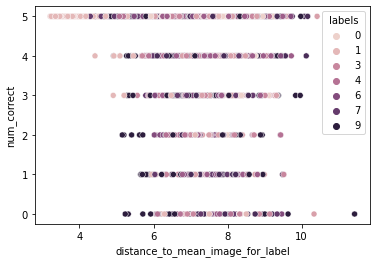

In [34]:
sns.scatterplot(df["distance_to_mean_image_for_label"], df["num_correct"], hue=df["labels"])

In [35]:
pearsonr(df["distance_to_mean_image_for_label"], df["num_uniq_predictions"])

(0.24276097085920412, 4.420393430575941e-134)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='distance_to_mean_image_for_label', ylabel='num_uniq_predictions'>

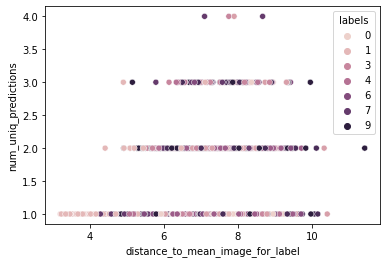

In [36]:
sns.scatterplot(df["distance_to_mean_image_for_label"], df["num_uniq_predictions"], hue=df["labels"])

### Relative distance

#### General

In [37]:
df["relative_distance"].value_counts()

1     8229
2      958
3      369
4      171
5       90
6       81
7       43
8       29
9       19
10      11
Name: relative_distance, dtype: int64

In [38]:
df.groupby("labels").mean()["relative_distance"]

labels
0    1.352041
1    1.081938
2    1.492248
3    1.483168
4    1.263747
5    1.466368
6    1.358038
7    1.352140
8    1.456879
9    1.423191
Name: relative_distance, dtype: float64

#### Analysis per-model

In [39]:
model_name = "model_1"

In [40]:
df.groupby(model_name).mean()["relative_distance"]

model_1
0    1.389000
1    1.108348
2    1.445226
3    1.464110
4    1.280374
5    1.499436
6    1.302424
7    1.328665
8    1.507538
9    1.404213
Name: relative_distance, dtype: float64

In [41]:
df[df[model_name] != df["labels"]].groupby(model_name).mean()["relative_distance"]

model_1
0    3.317073
1    4.111111
2    4.066667
3    3.083333
4    3.103448
5    3.031250
6    2.847826
7    2.861386
8    3.083333
9    3.170455
Name: relative_distance, dtype: float64

In [43]:
df.groupby(["labels", model_name]).mean()["relative_distance"][0]

model_1
0    1.306569
2    3.666667
3    3.333333
4    2.000000
5    5.166667
6    1.400000
7    4.000000
8    3.000000
Name: relative_distance, dtype: float64

#### Correlation

In [44]:
pearsonr(df["relative_distance"], df["num_correct"])

(-0.4844728572220709, 0.0)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='relative_distance', ylabel='num_correct'>

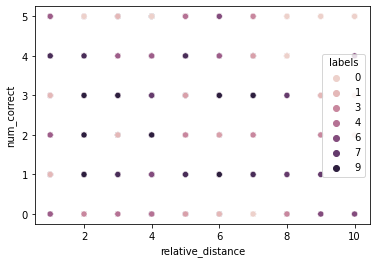

In [45]:
sns.scatterplot(df["relative_distance"], df["num_correct"], hue=df["labels"])

In [46]:
pearsonr(df["relative_distance"], df["num_uniq_predictions"])

(0.4712733600704331, 0.0)

### Other

In [47]:
df["num_uniq_predictions"].value_counts()

1    9197
2     719
3      80
4       4
Name: num_uniq_predictions, dtype: int64

In [48]:
# images where they all guess the same wrong number
df.loc[(df["num_uniq_predictions"] == 1) & (df["num_correct"] == 0)]

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels,num_correct,relative_distance,distance_to_mean_image_for_label
152,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,0,9,8.887291
372,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2,0,8,8.335752
588,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,0,2,6.931545
725,3,3,3,3,3,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2,0,3,7.361886
1116,6,6,6,6,6,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",8,0,2,7.845314
...,...,...,...,...,...,...,...,...,...,...,...
9538,7,7,7,7,7,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",3,0,2,7.074964
9627,2,2,2,2,2,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",1,0,3,7.505061
9789,9,9,9,9,9,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,0,4,6.108801
9793,5,5,5,5,5,1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",3,0,2,6.914523


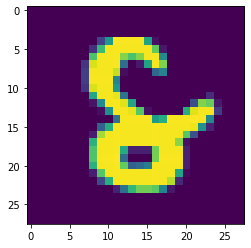

In [49]:
utils.display_image(images[1116])

In [50]:
# images that had different predictions
df_diff = df[df["num_uniq_predictions"] != 1]
df_diff

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels,num_correct,relative_distance,distance_to_mean_image_for_label
8,3,3,5,3,3,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",3,4,1,7.676022
30,0,9,0,0,9,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,2,4,7.286124
33,9,2,9,2,2,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,0,2,6.151596
42,9,9,9,4,9,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,4,1,5.852453
44,9,4,4,4,4,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,4,1,6.534949
...,...,...,...,...,...,...,...,...,...,...,...
9960,8,5,5,5,5,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,4,3,6.618892
9966,4,5,5,5,5,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,4,4,7.665083
9974,3,9,3,3,3,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,1,6,8.582188
9988,8,1,8,1,1,2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",1,3,1,6.474925


In [51]:
# images that had the most different predictions
df_diff[df_diff["num_uniq_predictions"] == 4]

,model_1,model_2,model_3,model_4,model_5,num_uniq_predictions,images,labels,num_correct,relative_distance,distance_to_mean_image_for_label
659,9,1,8,8,2,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",2,1,8,7.902810
1541,9,2,7,8,8,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",3,0,9,7.758935
6692,8,7,3,4,7,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,2,9,8.672063
7359,7,8,4,8,2,4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",7,1,1,7.104352


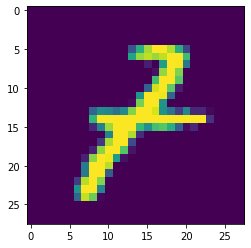

In [52]:
utils.display_image(images[6692])